<a href="https://colab.research.google.com/github/ApeWizard/mat281-entregable/blob/main/Laboratorio_2_Diego_Wielandt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

25792.20019866869 9449.962321455077


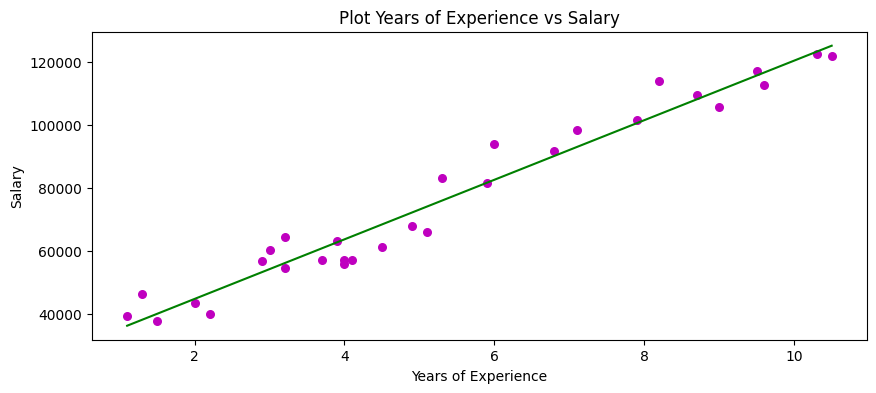

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

YearsExperience = np.array([
 1.1,1.3,1.5,2.0,2.2,
 2.9,3.0,3.2,3.2,3.7,
 3.9,4.0,4.0,4.1,4.5,
 4.9,5.1,5.3,5.9,6.0,
 6.8,7.1,7.9,8.2,8.7,
 9.0,9.5,9.6,10.3,10.5
 ])

Salary =  np.array([
 39343.0,46205.0,37731.0,43525.0,39891.0,
 56642.0,60150.0,54445.0,64445.0,57189.0,
 63218.0,55794.0,56957.0,57081.0,61111.0,
 67938.0,66029.0,83088.0,81363.0,93940.0,
 91738.0,98273.0,101302.0,113812.0,109431.0,
 105582.0,116969.0,112635.0,122391.0,121872.0
])

def estimate_coef(x,y):
  n_x, n_y= np.size(x), np.size(y)
  m_x,m_y=np.mean(x),np.mean(y)

  b1_num = (x-m_x)*(y-m_y)
  b1_den = (x-m_x)**2

  b1=b1_num.sum()/b1_den.sum()
  b0=m_y-b1*m_x

  return (b0,b1)


def plot_regression_line(YearsExperience,Salary, yhat):
  plt.figure(figsize=(10,4))
  plt.scatter(YearsExperience, Salary, color = "m",marker = "o", s = 30)

  plt.plot(YearsExperience, yhat, color = "g")

  plt.xlabel('Years of Experience')
  plt.ylabel('Salary')
  plt.title("Plot Years of Experience vs Salary")

  plt.show()

beta = estimate_coef(YearsExperience,Salary)
print(beta[0],beta[1])
prediccion=beta[0] + beta[1]*YearsExperience
plot_regression_line(YearsExperience, Salary, prediccion)

In [3]:
def calculate_error_metrics(y,yhat):
  difference = y-yhat
  t_sum = np.abs(y) + np.abs(yhat)
  n = np.size(y)
  MAE = np.sum(np.abs(difference))/n
  RMSE = np.sqrt(np.sum(difference**2)/n)
  MAPE = np.sum(np.abs(difference/y))/n
  sMAPE = np.sum(2*np.abs(difference)/t_sum)/n
  r_squared = 1-np.sum(difference**2)/np.sum((y-np.mean(y))**2)
  return MAE,RMSE,MAPE,sMAPE,r_squared

error_vector = calculate_error_metrics(Salary,prediccion)
MAE = error_vector[0]
RMSE = error_vector[1]
MAPE = error_vector[2]
sMAPE = error_vector[3]
r_squared = error_vector[4]
print("MAE: ",MAE)
print("RMSE: ",RMSE)
print("MAPE: ",MAPE)
print("sMAPE: ",sMAPE)
print("R^2: ",r_squared)



MAE:  4644.201289443538
RMSE:  5592.043608760662
MAPE:  0.07048034398306607
sMAPE:  0.07036700898303877
R^2:  0.9569566641435086


Obtenemos $\beta_0 = 25.792,20$ y $\beta_1 = 9.449,96$. El modelo es $\hat{y}=\beta_0 + \beta_1x$. El MAE nos indica que en promedio hay un error de 4644,2 dólares (o unidad monetaria correspondiente), que es bajo comparado con la magnitud de los salarios en los datos. El error porcentual promedio es de 7,05% y el simétrico de 7,04%. Que $RMSE > MSE$ sugiere que hay algunos $|y_i - \hat{y}_i|$ grandes, por lo que $\beta_1$ podría ser mas pequeño para valores grandes de $x$. Es decir, mientras más años de experiencia se consideran, menos adecuado es el modelo. Finalmente, sabemos que en general el modelo explica 95% de la varianza. Por tanto, es un buen modelo en general.